# Customer Analysis

In [1]:
# Setting up execution path
import os

print(f"Current working directory: {os.path.basename(os.getcwd())}")

# Change to root directory
os.chdir("../")
print(f"Current working directory (Changed): {os.path.basename(os.getcwd())}")

Current working directory: notebooks
Current working directory (Changed): Retail-Customer-Analysis


In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# module setup
%matplotlib inline
pd.options.display.precision = 3
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("data/final/online_retail.csv", parse_dates=["invoice_date"])
df.head()

,invoice_no,customer_id,invoice_date,country,quantity,sales_amount
0,489434,13085,2009-12-01,United Kingdom,12,83.4
1,489434,13085,2009-12-01,United Kingdom,12,81.0
2,489434,13085,2009-12-01,United Kingdom,12,81.0
3,489434,13085,2009-12-01,United Kingdom,48,100.8
4,489434,13085,2009-12-01,United Kingdom,24,30.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805531 entries, 0 to 805530
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    805531 non-null  int64         
 1   customer_id   805531 non-null  int64         
 2   invoice_date  805531 non-null  datetime64[ns]
 3   country       805531 non-null  object        
 4   quantity      805531 non-null  int64         
 5   sales_amount  805531 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 36.9+ MB


In [5]:
df = df[df["invoice_date"] < "2010-12-31"]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433807 entries, 0 to 433806
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    433807 non-null  int64         
 1   customer_id   433807 non-null  int64         
 2   invoice_date  433807 non-null  datetime64[ns]
 3   country       433807 non-null  object        
 4   quantity      433807 non-null  int64         
 5   sales_amount  433807 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 23.2+ MB


In [7]:
customer_df = df[["customer_id", "invoice_date"]].copy(deep=True)
customer_df.head()

,customer_id,invoice_date
0,13085,2009-12-01
1,13085,2009-12-01
2,13085,2009-12-01
3,13085,2009-12-01
4,13085,2009-12-01


In [8]:
customer_df["first_transaction_date"] = customer_df.groupby("customer_id")[
    "invoice_date"
].transform(lambda grp: grp.min())

customer_df.head()

,customer_id,invoice_date,first_transaction_date
0,13085,2009-12-01,2009-12-01
1,13085,2009-12-01,2009-12-01
2,13085,2009-12-01,2009-12-01
3,13085,2009-12-01,2009-12-01
4,13085,2009-12-01,2009-12-01


In [9]:
customer_df["ft_month_year"] = customer_df["first_transaction_date"].dt.to_period(
    freq="M"
)

customer_df.head()

,customer_id,invoice_date,first_transaction_date,ft_month_year
0,13085,2009-12-01,2009-12-01,2009-12
1,13085,2009-12-01,2009-12-01,2009-12
2,13085,2009-12-01,2009-12-01,2009-12
3,13085,2009-12-01,2009-12-01,2009-12
4,13085,2009-12-01,2009-12-01,2009-12


In [10]:
customer_df["months_since_first_transaction"] = (
    customer_df["invoice_date"].dt.year - customer_df["first_transaction_date"].dt.year
) * 12 + (
    customer_df["invoice_date"].dt.month
    - customer_df["first_transaction_date"].dt.month
)

In [11]:
new_df = (
    customer_df.groupby(["ft_month_year", "months_since_first_transaction"])[
        "customer_id"
    ]
    .nunique()
    .reset_index()
)

new_df

,ft_month_year,months_since_first_transaction,customer_id
0,2009-12,0,955
1,2009-12,1,337
2,2009-12,2,319
3,2009-12,3,406
4,2009-12,4,363
...,...,...,...
86,2010-10,1,97
87,2010-10,2,55
88,2010-11,0,325
89,2010-11,1,57


In [12]:
cohort = new_df.pivot_table(
    index="ft_month_year",
    columns="months_since_first_transaction",
    values="customer_id",
    aggfunc="sum",
)

cohort

months_since_first_transaction,0,1,2,3,4,5,6,7,8,9,10,11,12
ft_month_year,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,359.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,66.0,NaN
2010-02,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,43.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


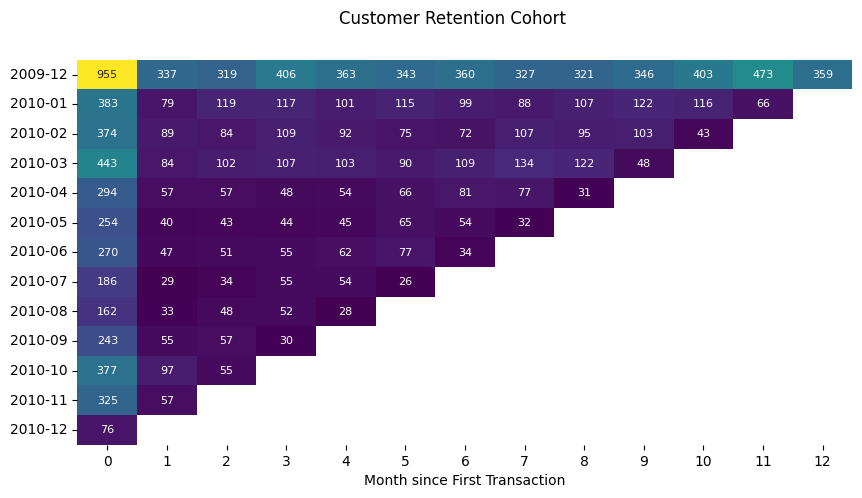

In [13]:
# Set a custom style for the plot
plt.style.use("default")

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    cohort,
    annot=True,
    cmap="viridis",
    annot_kws={"size": 8, "ha": "center", "va": "center"},
    fmt=".0f",
    cbar=False,
)

plt.xlabel("Month since First Transaction")
plt.ylabel("")
plt.suptitle("Customer Retention Cohort")

# show plot
plt.show()

In [14]:
retention_rate = cohort.copy(deep=True)

for col in retention_rate.columns:
    if col != 0:
        retention_rate[col] = round((retention_rate[col] / retention_rate[0]), 2)

retention_rate

months_since_first_transaction,0,1,2,3,4,5,6,7,8,9,10,11,12
ft_month_year,,,,,,,,,,,,,
2009-12,955.0,0.35,0.33,0.43,0.38,0.36,0.38,0.34,0.34,0.36,0.42,0.50,0.38
2010-01,383.0,0.21,0.31,0.31,0.26,0.30,0.26,0.23,0.28,0.32,0.30,0.17,NaN
2010-02,374.0,0.24,0.22,0.29,0.25,0.20,0.19,0.29,0.25,0.28,0.11,NaN,NaN
2010-03,443.0,0.19,0.23,0.24,0.23,0.20,0.25,0.30,0.28,0.11,NaN,NaN,NaN
2010-04,294.0,0.19,0.19,0.16,0.18,0.22,0.28,0.26,0.11,NaN,NaN,NaN,NaN
2010-05,254.0,0.16,0.17,0.17,0.18,0.26,0.21,0.13,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,0.17,0.19,0.20,0.23,0.29,0.13,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,0.16,0.18,0.30,0.29,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,0.20,0.30,0.32,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


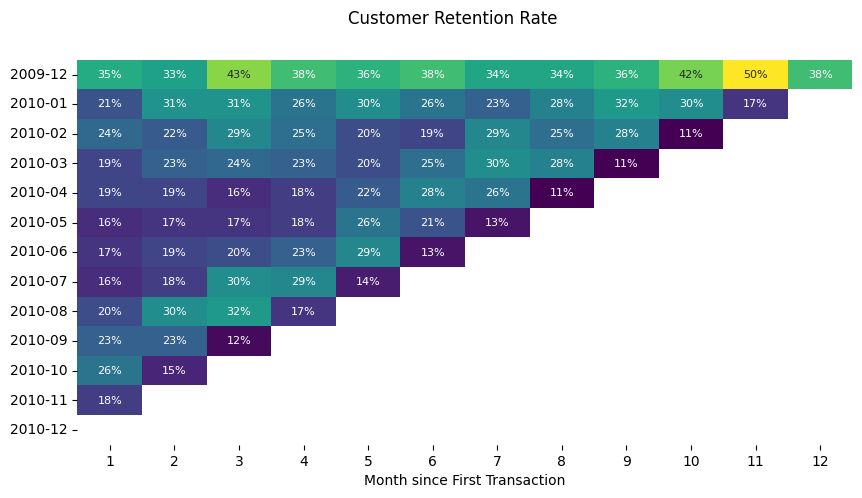

In [15]:
# Set a custom style for the plot
plt.style.use("default")

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    retention_rate.iloc[:, 1:],
    annot=True,
    cmap="viridis",
    annot_kws={"size": 8, "ha": "center", "va": "center"},
    fmt=".0%",
    cbar=False,
)

plt.xlabel("Month since First Transaction")
plt.ylabel("")
plt.suptitle("Customer Retention Rate")

# show plot
plt.show()

In [16]:
churn = cohort.copy(deep=True)

for col in churn.columns:
    if col != 0:
        churn[col] = churn[0] - churn[col]

churn

months_since_first_transaction,0,1,2,3,4,5,6,7,8,9,10,11,12
ft_month_year,,,,,,,,,,,,,
2009-12,955.0,618.0,636.0,549.0,592.0,612.0,595.0,628.0,634.0,609.0,552.0,482.0,596.0
2010-01,383.0,304.0,264.0,266.0,282.0,268.0,284.0,295.0,276.0,261.0,267.0,317.0,NaN
2010-02,374.0,285.0,290.0,265.0,282.0,299.0,302.0,267.0,279.0,271.0,331.0,NaN,NaN
2010-03,443.0,359.0,341.0,336.0,340.0,353.0,334.0,309.0,321.0,395.0,NaN,NaN,NaN
2010-04,294.0,237.0,237.0,246.0,240.0,228.0,213.0,217.0,263.0,NaN,NaN,NaN,NaN
2010-05,254.0,214.0,211.0,210.0,209.0,189.0,200.0,222.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,223.0,219.0,215.0,208.0,193.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,157.0,152.0,131.0,132.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,129.0,114.0,110.0,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


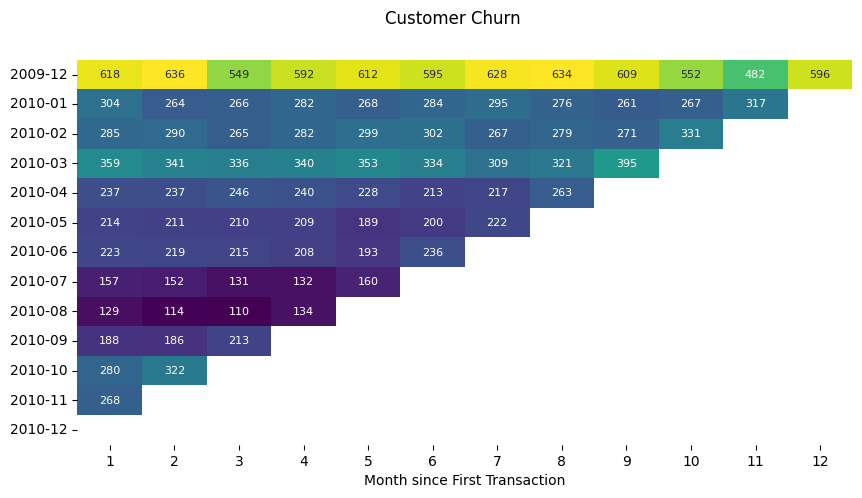

In [17]:
# Set a custom style for the plot
plt.style.use("default")

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    churn.iloc[:, 1:],
    annot=True,
    cmap="viridis",
    annot_kws={"size": 8, "ha": "center", "va": "center"},
    fmt=".0f",
    cbar=False,
)

plt.xlabel("Month since First Transaction")
plt.ylabel("")
plt.suptitle("Customer Churn")

# show plot
plt.show()

In [18]:
churn_rate = churn.copy(deep=True)

for col in churn_rate.columns:
    if col != 0:
        churn_rate[col] = round((churn_rate[col] / churn_rate[0]), 2)

churn_rate

months_since_first_transaction,0,1,2,3,4,5,6,7,8,9,10,11,12
ft_month_year,,,,,,,,,,,,,
2009-12,955.0,0.65,0.67,0.57,0.62,0.64,0.62,0.66,0.66,0.64,0.58,0.50,0.62
2010-01,383.0,0.79,0.69,0.69,0.74,0.70,0.74,0.77,0.72,0.68,0.70,0.83,NaN
2010-02,374.0,0.76,0.78,0.71,0.75,0.80,0.81,0.71,0.75,0.72,0.89,NaN,NaN
2010-03,443.0,0.81,0.77,0.76,0.77,0.80,0.75,0.70,0.72,0.89,NaN,NaN,NaN
2010-04,294.0,0.81,0.81,0.84,0.82,0.78,0.72,0.74,0.89,NaN,NaN,NaN,NaN
2010-05,254.0,0.84,0.83,0.83,0.82,0.74,0.79,0.87,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,0.83,0.81,0.80,0.77,0.71,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,0.84,0.82,0.70,0.71,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,0.80,0.70,0.68,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


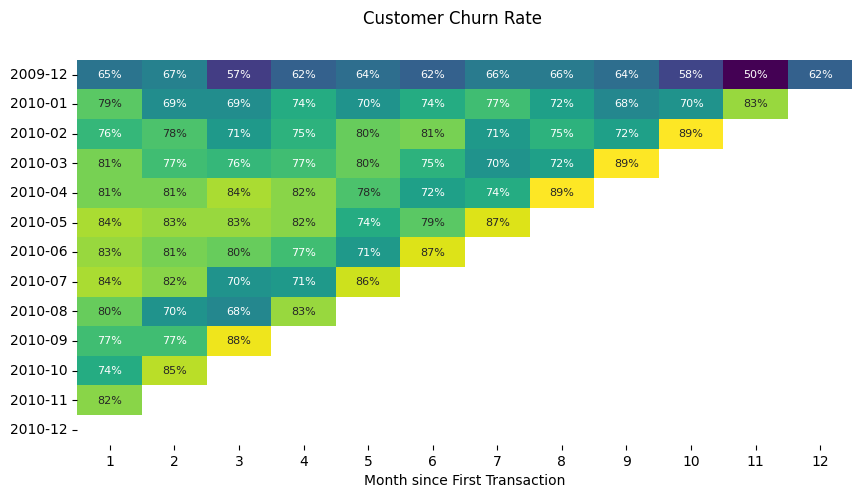

In [19]:
# Set a custom style for the plot
plt.style.use("default")

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(
    churn_rate.iloc[:, 1:],
    annot=True,
    cmap="viridis",
    annot_kws={"size": 8, "ha": "center", "va": "center"},
    fmt=".0%",
    cbar=False,
)

plt.xlabel("Month since First Transaction")
plt.ylabel("")
plt.suptitle("Customer Churn Rate")

# show plot
plt.show()

In [31]:
retention = new_df.groupby("months_since_first_transaction")["customer_id"].sum()
retention

months_since_first_transaction
0     4342
1     1004
2      969
3     1023
4      902
5      857
6      809
7      765
8      676
9      619
10     562
11     539
12     359
Name: customer_id, dtype: int64

In [32]:
ret_rate = round(retention / retention.iloc[0], 2)
ret_rate

months_since_first_transaction
0     1.00
1     0.23
2     0.22
3     0.24
4     0.21
5     0.20
6     0.19
7     0.18
8     0.16
9     0.14
10    0.13
11    0.12
12    0.08
Name: customer_id, dtype: float64

<Axes: xlabel='months_since_first_transaction'>

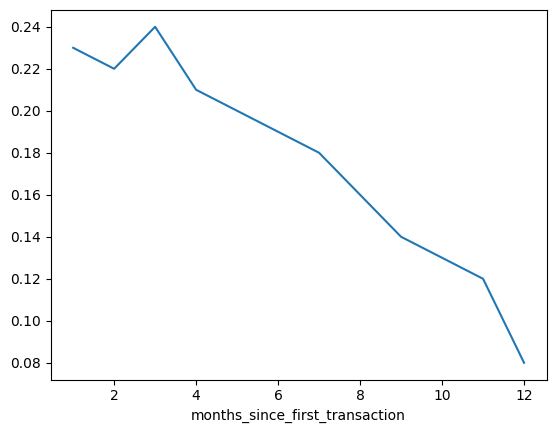

In [50]:
ret_rate[1:].plot()

In [51]:
chr = retention.iloc[0] - retention
chr

months_since_first_transaction
0        0
1     3338
2     3373
3     3319
4     3440
5     3485
6     3533
7     3577
8     3666
9     3723
10    3780
11    3803
12    3983
Name: customer_id, dtype: int64

In [52]:
chr_rate = round(chr / retention.iloc[0], 2)

chr_rate

months_since_first_transaction
0     0.00
1     0.77
2     0.78
3     0.76
4     0.79
5     0.80
6     0.81
7     0.82
8     0.84
9     0.86
10    0.87
11    0.88
12    0.92
Name: customer_id, dtype: float64

<Axes: xlabel='months_since_first_transaction'>

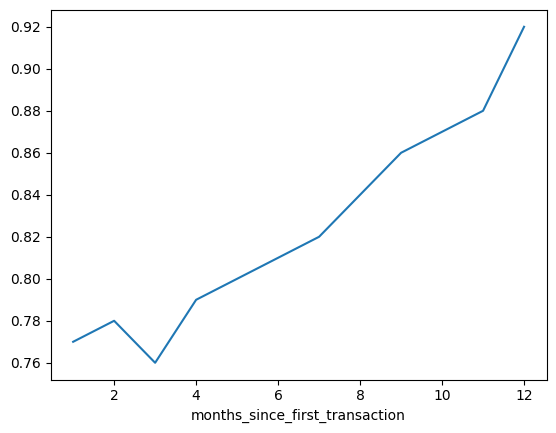

In [53]:
chr_rate[1:].plot()

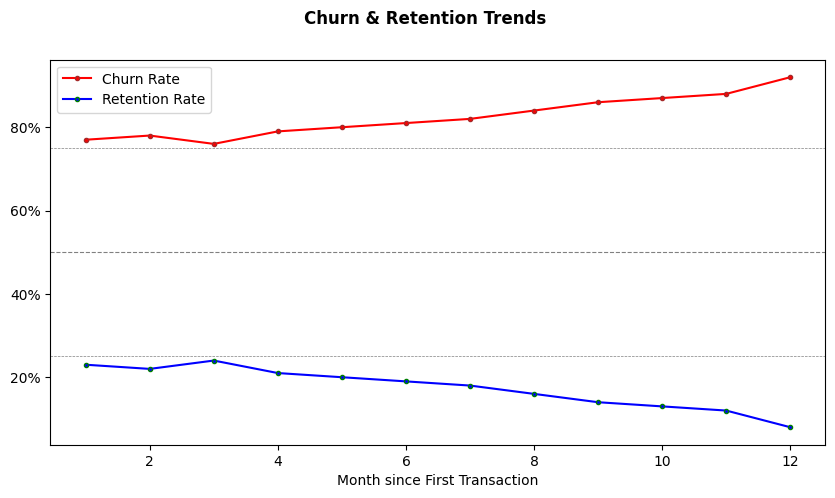

In [64]:
from matplotlib.ticker import FuncFormatter

# Create a new figure with a specified size
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot()

chr_line = ax.plot(
    chr_rate[1:],
    color="red",
    marker="o",
    markersize=3,
    markeredgewidth=1,
    markeredgecolor="brown",
    label="Churn Rate",
)
ret_line = ax.plot(
    ret_rate[1:],
    color="blue",
    marker="o",
    markersize=3,
    markeredgewidth=1,
    markeredgecolor="green",
    label="Retention Rate",
)

ax.axhline(y=0.25, color="grey", linestyle="--", linewidth=0.5)
ax.axhline(y=0.5, color="grey", linestyle="--", linewidth=0.8)
ax.axhline(y=0.75, color="grey", linestyle="--", linewidth=0.5)

ax.set_xlabel("Month since First Transaction")

ax.legend()

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0%}"))

fig.suptitle(
    "Churn & Retention Trends",
    fontweight="bold",
)

plt.show()

In [76]:
cohort

months_since_first_transaction,0,1,2,3,4,5,6,7,8,9,10,11,12
ft_month_year,,,,,,,,,,,,,
2009-12,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,359.0
2010-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,66.0,NaN
2010-02,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,43.0,NaN,NaN
2010-03,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,48.0,NaN,NaN,NaN
2010-04,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,31.0,NaN,NaN,NaN,NaN
2010-05,254.0,40.0,43.0,44.0,45.0,65.0,54.0,32.0,NaN,NaN,NaN,NaN,NaN
2010-06,270.0,47.0,51.0,55.0,62.0,77.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07,186.0,29.0,34.0,55.0,54.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08,162.0,33.0,48.0,52.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
cohort_last_vals = cohort.apply(lambda x: x.loc[x.last_valid_index()])
cohort_last_vals.sum()

885.0

In [80]:
churn_vals = churn.apply(lambda x: x.loc[x.last_valid_index()])
churn_vals.sum()

3533.0